In [2]:
import mpl_toolkits
from mpl_toolkits import mplot3d
# %matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math as mt
import datetime
from datetime import datetime, timedelta, time

import statistics
import seaborn as sns

In [3]:
#ANALYZING DP AND SP 
# if movies are in lots of different folders
file_list=[]
folderpath='/Users/secchim/Downloads/CellProfiler/TilescanKuO/test_cp_output/output_tilescansv2'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('DP.csv'):
            # file_list.append(os.path.join(root,file))
            data=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
            file_list.append(data)

dataDP=pd.concat(file_list, axis =0, ignore_index=True)
dataDP['Hoxb5_status']='DP'
print(dataDP)

file_list=[]
folderpath='/Users/secchim/Downloads/CellProfiler/TilescanKuO/test_cp_output/output_tilescansv2'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('SP.csv'):
            # file_list.append(os.path.join(root,file))
            data=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
            file_list.append(data)

dataSP=pd.concat(file_list, axis =0, ignore_index=True)
dataSP['Hoxb5_status']='SP'

  ImageNumber ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
0           5            1                 NaN                    NaN   
1           5            2                 NaN                    NaN   

   Metadata_Format Metadata_Frame Metadata_Series  \
0              NaN              0               0   
1              NaN              0               0   

                                   Metadata_VWF  \
0  VWF_062_MS220421_M5_TILESCANpadding-stitched   
1  VWF_062_MS220421_M5_TILESCANpadding-stitched   

                                 Metadata_VWF.1  \
0  VWF_062_MS220421_M5_TILESCANpadding-stitched   
1  VWF_062_MS220421_M5_TILESCANpadding-stitched   

                                 Metadata_VWF.2  ...  \
0  VWF_062_MS220421_M5_TILESCANpadding-stitched  ...   
1  VWF_062_MS220421_M5_TILESCANpadding-stitched  ...   

  Neighbors_PercentTouching_WatershedAF647_30  \
0                                       100.0   
1                                       100.0

In [4]:
data=pd.concat([dataSP, dataDP], axis=0, ignore_index=True)
print(data)

   ImageNumber ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
0            5            1                 NaN                    NaN   
1            5            2                 NaN                    NaN   
2            5            3                 NaN                    NaN   
3            5            4                 NaN                    NaN   
4            5            5                 NaN                    NaN   
5            5            6                 NaN                    NaN   
6            5            7                 NaN                    NaN   
7            4            1                 NaN                    NaN   
8            4            2                 NaN                    NaN   
9            4            3                 NaN                    NaN   
10           4            4                 NaN                    NaN   
11           4            5                 NaN                    NaN   
12           4            6           

In [5]:
#importing the metadata
metadata=pd.read_csv('/Users/secchim/Documents/221103merged_metadata_and_mice.csv')

metadata['Metadata_VWF']=(metadata['Original_Filename']).str.replace('.czi','')
data=pd.merge(data, metadata[:], on = 'Metadata_VWF')
print(data)


   ImageNumber ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
0            5            1                 NaN                    NaN   
1            5            2                 NaN                    NaN   
2            5            3                 NaN                    NaN   
3            5            4                 NaN                    NaN   
4            5            5                 NaN                    NaN   
5            5            6                 NaN                    NaN   
6            5            7                 NaN                    NaN   
7            5            1                 NaN                    NaN   
8            5            2                 NaN                    NaN   
9            4            1                 NaN                    NaN   
10           4            2                 NaN                    NaN   
11           4            3                 NaN                    NaN   
12           4            4           

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2970/3618419469.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  metadata['Metadata_VWF']=(metadata['Original_Filename']).str.replace('.czi','')


In [20]:
data.to_csv('/Users/secchim/Documents/221124TEST.csv')

/opt/anaconda3/envs/New_environment220920/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/New_environment220920/lib/python3.8/site-packages/seaborn/categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:, self.cat_axis] = adjusted_data


<AxesSubplot: xlabel='Treatment', ylabel='Intensity_MinIntensity_DistanceTransformMK'>

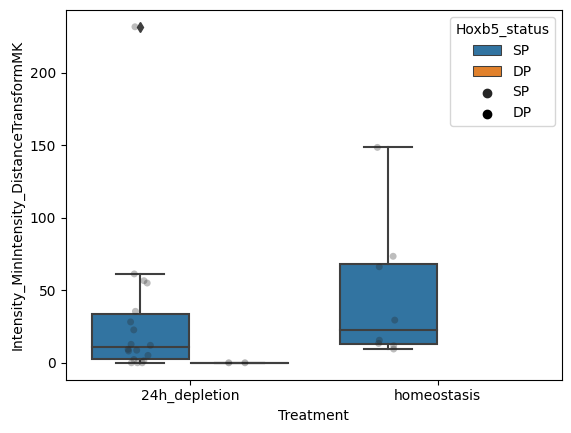

In [6]:
sns.boxplot(x=("Treatment"), hue='Hoxb5_status', y="Intensity_MinIntensity_DistanceTransformMK", data=data)
sns.stripplot(x=("Treatment"),hue='Hoxb5_status', y="Intensity_MinIntensity_DistanceTransformMK", data=data, dodge=True, color='black', alpha=0.3)


/opt/anaconda3/envs/New_environment220920/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/New_environment220920/lib/python3.8/site-packages/seaborn/categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:, self.cat_axis] = adjusted_data


<AxesSubplot: xlabel='Treatment', ylabel='Intensity_MinIntensity_DistanceTransformMKprog'>

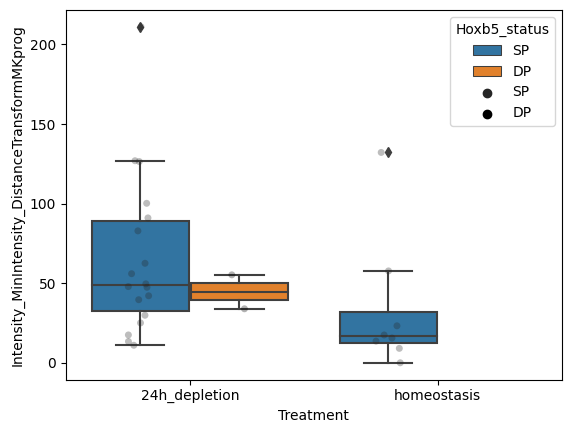

In [7]:
sns.boxplot(x=("Treatment"), hue='Hoxb5_status', y="Intensity_MinIntensity_DistanceTransformMKprog", data=data)
sns.stripplot(x=("Treatment"),hue='Hoxb5_status', y="Intensity_MinIntensity_DistanceTransformMKprog", data=data, dodge=True, color='black', alpha=0.3)


/opt/anaconda3/envs/New_environment220920/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/New_environment220920/lib/python3.8/site-packages/seaborn/categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:, self.cat_axis] = adjusted_data


<AxesSubplot: xlabel='Treatment', ylabel='Intensity_MinIntensity_DistanceTransformvessel'>

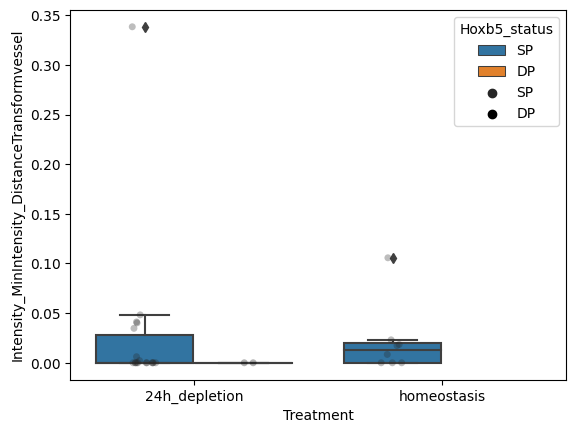

In [8]:
sns.boxplot(x=("Treatment"), hue='Hoxb5_status', y="Intensity_MinIntensity_DistanceTransformvessel", data=data)
sns.stripplot(x=("Treatment"),hue='Hoxb5_status', y="Intensity_MinIntensity_DistanceTransformvessel", data=data, dodge=True, color='black', alpha=0.3)


In [58]:
#Analyze BM volume 
file_list=[]
folderpath='/Users/secchim/Downloads/CellProfiler/TilescanKuO/test_cp_output/output_tilescansv2'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('Ilastik.csv'):
            # file_list.append(os.path.join(root,file))
            dataIlastik=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
            file_list.append(dataIlastik)

dataIlastik=pd.concat(file_list, axis =0, ignore_index=True)
print(dataIlastik)

      ImageNumber  ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
0               5             1                 NaN                    NaN   
1               5             2                 NaN                    NaN   
2               5             3                 NaN                    NaN   
3               5             4                 NaN                    NaN   
4               5             5                 NaN                    NaN   
...           ...           ...                 ...                    ...   
7049            8           738                 NaN                    NaN   
7050            8           739                 NaN                    NaN   
7051            8           740                 NaN                    NaN   
7052            8           741                 NaN                    NaN   
7053            8           742                 NaN                    NaN   

      Metadata_Format  Metadata_Frame  Metadata_Series  \
0    

In [59]:
#Calculate total BM volume per tilescan
grouped=dataIlastik.groupby(['Metadata_VWF'])
dflist=[]
for i, newdf in grouped:
    newdf['BM_volume']=(newdf['AreaShape_Volume'].sum())/(0.829*0.829*3)
    dflist.append(newdf)
dataIlastik=pd.concat(dflist)
print(dataIlastik['BM_volume']) 

1874    4.070559e+07
1875    4.070559e+07
1876    4.070559e+07
1877    4.070559e+07
1878    4.070559e+07
            ...     
7049    1.782827e+07
7050    1.782827e+07
7051    1.782827e+07
7052    1.782827e+07
7053    1.782827e+07
Name: BM_volume, Length: 7054, dtype: float64


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_82893/3993930723.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


In [60]:
#Calculate vessel volume 
file_list=[]
folderpath='/Users/secchim/Downloads/CellProfiler/TilescanKuO/test_cp_output/output_tilescansv2'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('AF647.csv'):
            # file_list.append(os.path.join(root,file))
            dataAF647=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
            file_list.append(dataAF647)

dataAF647=pd.concat(file_list, axis =0, ignore_index=True)
# print(dataAF647)

grouped=dataAF647.groupby(['Metadata_VWF'])
dflist=[]
for i, newdf in grouped:
    newdf['vessel_volume']=(newdf['AreaShape_Volume'].sum())/(0.829*0.829*3)
    dflist.append(newdf)
dataAF647=pd.concat(dflist)
print(dataAF647['vessel_volume']) 

1714    5.275700e+06
1715    5.275700e+06
1716    5.275700e+06
1717    5.275700e+06
1718    5.275700e+06
            ...     
3461    3.107186e+06
3462    3.107186e+06
3463    3.107186e+06
3464    3.107186e+06
3465    3.107186e+06
Name: vessel_volume, Length: 3466, dtype: float64


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_82893/581798209.py:16: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


In [61]:
#Merge dataIlastik and dataAF647
dataI=dataIlastik[['BM_volume','Metadata_VWF']]
dataI=dataI.drop_duplicates()
dataV=dataAF647[['vessel_volume','Metadata_VWF']]
dataV=dataV.drop_duplicates()
dataBM=pd.merge(dataI, dataV[:], on = 'Metadata_VWF')
# print(dataBM)

#Subtract vessel volume to BM volume
for i in dataBM.index:
    dataBM.loc[i,'BM_vessel']=dataBM.loc[i,'BM_volume']-dataBM.loc[i,'vessel_volume']
#calculate cell number (cell volume of a diameter of 10um = 523.6, 11um =726)
    dataBM.loc[i,'Cellularity']=dataBM.loc[i,'BM_vessel']/736.9

print(dataBM)

#Haematopoietic stem cells in perisinusoidal niches are protected from ageing 
#this paper estimates 1357 cells in 1 000 000 = 736.9 for 1 cells

      BM_volume                                  Metadata_VWF  vessel_volume  \
0  4.070559e+07   VWF_060_MS220408_M2_tilescanpadded-stitched   5.275700e+06   
1  1.023717e+07  VWF_062_MS220421_M5_TILESCANpadding-stitched   1.809441e+06   
2  1.673442e+07   VWF_063_MS220428_m1_tilescanpadded-stitched   2.453175e+06   
3  2.184423e+07  VWF_063_MS220428_m2_tilescan2padded-stitched   4.990769e+06   
4  1.782827e+07   VWF_063_MS220428_m2_tilescanpadded-stitched   3.107186e+06   

      BM_vessel   Cellularity  
0  3.542989e+07  48079.639125  
1  8.427732e+06  11436.737749  
2  1.428125e+07  19380.171335  
3  1.685346e+07  22870.753163  
4  1.472109e+07  19977.046042  


In [65]:
#Calculate the frequency of KuO per tilescan

# print(data['Hoxb5_status'])
grouped=data.groupby(['Metadata_VWF'])
dflist=[]
for i, newdf in grouped:
    newdf['SP_nb']=newdf[newdf['Hoxb5_status']=='SP'].shape[0]
    newdf['DP_nb']=newdf[newdf['Hoxb5_status']=='DP'].shape[0]
    dflist.append(newdf)
data=pd.concat(dflist)
# print(data['SP_nb'], data['DP_nb']) 

dataF=data[['Metadata_VWF', 'SP_nb','DP_nb']]
dataF=dataF.drop_duplicates()
dataF=pd.merge(dataF, dataBM[:], on = 'Metadata_VWF')

for i in dataF.index:
    dataF.loc[i, 'SP_freq']=dataF.loc[i,'SP_nb']/dataF.loc[i,'Cellularity']
    dataF.loc[i,'DP_freq']=dataF.loc[i, 'DP_nb']/dataF.loc[i,'Cellularity']
    dataF.loc[i,'Kuo_freq']=(dataF.loc[i,'SP_nb']+dataF.loc[i,'DP_nb'])/dataF.loc[i,'Cellularity']
print(dataF['SP_freq'], dataF['DP_freq'], dataF['Kuo_freq'], dataF['Metadata_VWF'])

#PB VWF_063_m2_tilescanpadded2 has no SP
#Kuo freqfreq between 0.00005 and 0.0007 => between 0.005% and 0.07% Sacma is between 0.01 and 0.07%
#by FACS SP freq is between 0.04%and 0.01%
#by FACS DP freq is about 0.00001 => 0.00001 x Cellularity would be expected number of DP => under 1 in some tilescans

0    0.000187
1    0.000612
2    0.000052
3    0.000050
Name: SP_freq, dtype: float64 0    0.000000
1    0.000175
2    0.000000
3    0.000000
Name: DP_freq, dtype: float64 0    0.000187
1    0.000787
2    0.000052
3    0.000050
Name: Kuo_freq, dtype: float64 0     VWF_060_MS220408_M2_tilescanpadded-stitched
1    VWF_062_MS220421_M5_TILESCANpadding-stitched
2     VWF_063_MS220428_m1_tilescanpadded-stitched
3     VWF_063_MS220428_m2_tilescanpadded-stitched
Name: Metadata_VWF, dtype: object


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_82893/1391628523.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


xyzt
